In [1]:
import numpy as np
from math import *
from random import *
import matplotlib.pyplot as plt

from datetime import datetime
time1=datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                                                  
#----------PARAMETERS-------------------
T=300.0                                   #temparature in unit kelvin
eta=1e4                       #
eta_s=1e-3
a=2e-6                          #diameter of the probe sphere in meter

dt_min=1e-8                                      #time step in unit second
dt_max=1e4
tf=1.5e7                             #total time in unit second

kb=1.38e-23                      #boltzman constant s.i unit
Gp=1000                                    #elastic modulus for both model Pa


In [2]:

#some constants determined from the above parameters

D=(kb*T)/(6*pi*eta*(a/2))                  #diffusion coefficient of liquid
m=0.0                                     #mean of the random walk motion
lamb=(eta_s/Gp)
k=6*pi*(a/2)*Gp   

#body of the code
xm=0.0                                     #initial x cordinate in unit micro meter
ym=0.0                                     #initial y cordinate in unit micro meter
xarr_m=[]                                #list of total x after ith step
yarr_m=[]                                #list of total y after ith step

xv=0.0                                     #initial x cordinate in unit micro meter
yv=0.0                                     #initial y cordinate in unit micro meter
xarr_v=[]                                #list of total x after ith step
yarr_v=[]                                #list of total y after 

t=0.0
t_arr=[]                               #delta time array in seconds



In [3]:
while t < tf:
    #--------------------maxwell part------------------
    p=uniform(-8,4)
    dt=(10**p)                            #linear distributed in 10 base logscale of time
    s=((2*D*dt)**(0.5))                   #standard deviation of the random walk in  meter
    
    xm=xm+(gauss(m,s))
    xarr_m.append(xm)
    
    ym=ym+(gauss(m,s))
    yarr_m.append(ym)
    
    
    #---------------------voigt part-----------------
    Ax=xv*exp(-(dt/lamb))
    Bx=sqrt(((kb*T)/k)*(1-exp(-(2*dt/lamb))))
    
    Ay=yv*exp(-(dt/lamb))
    By=sqrt(((kb*T)/k)*(1-exp(-(2*dt/lamb))))
    
    xv=(gauss(Ax,Bx))
    xarr_v.append(xv)
    
    yv=(gauss(Ay,By))
    yarr_v.append(yv)
    
    t=t+dt
    t_arr.append(t)
    
    
xarr_m=np.array(xarr_m)
yarr_m=np.array(yarr_m)
xarr_v=np.array(xarr_v)
yarr_v=np.array(yarr_v)
    
xarr_mv=xarr_m +xarr_v
yarr_mv=yarr_m +yarr_v


print('t_total = ',max(t_arr))

print('total number of steps = ',len(xarr_mv))



t_total 15000603.317812258
total number of steps 41129


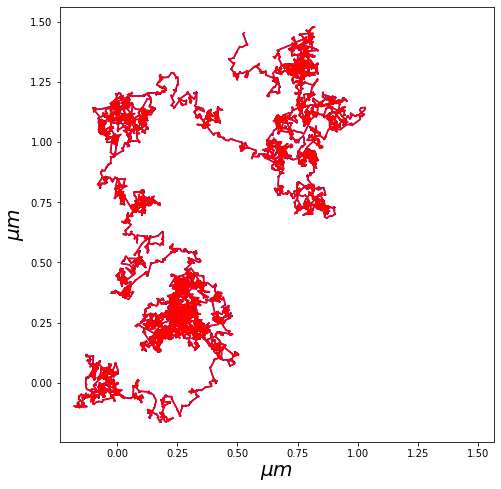

In [8]:
from pylab import rcParams
rcParams ['figure.figsize']=8,8

plt.plot(xarr_mv*1e6,yarr_mv*1e6,'blue')
plt.plot(xarr_m*1e6,yarr_m*1e6,'red')

plt.ylabel(r'$ \mu m$',size=20)
plt.xlabel(r'$ \mu m$',size=20)
plt.axis('square')
plt.show()


<IPython.core.display.Javascript object>


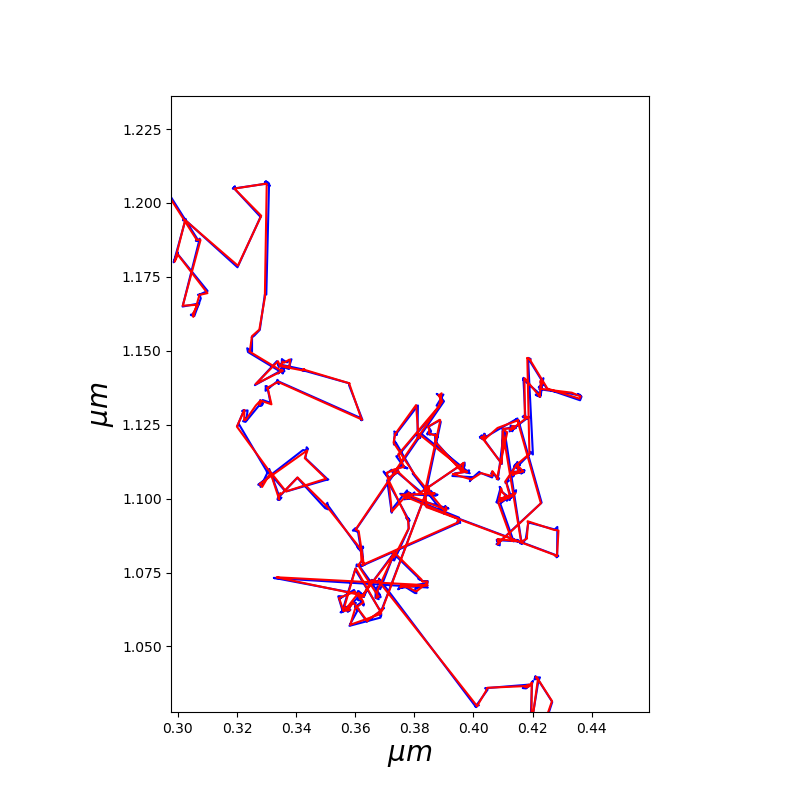

In [9]:
%matplotlib notebook
from pylab import rcParams
rcParams ['figure.figsize']=8,8

plt.plot(xarr_mv*1e6,yarr_mv*1e6,'blue')
plt.plot(xarr_m*1e6,yarr_m*1e6,'red')

plt.ylabel(r'$ \mu m$',size=20)
plt.xlabel(r'$ \mu m$',size=20)
plt.axis('square')
plt.show()



In [33]:
time2=datetime.now().strftime('%Y-%m-%d %H:%M:%S') # final time ending of the run time
print(time1)
print(time2)

2019-10-23 08:39:52
2019-10-23 08:39:58


In [34]:
np.savetxt('x_arr_vts_00.txt',xarr_mv)
np.savetxt('y_arr_vts_00.txt', yarr_mv)
np.savetxt('dt_arr_vts_00.txt',t_arr)